# Assignment 4
Rosa Kurtz

### 1) Gaussian Quadrature

In [13]:
#a use numpy lengendre N=3

# Python
from datetime import datetime
from math     import erf

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy                     as np
import numpy.polynomial.legendre as legendre

a  = -1
b  = 1

# Define Gaussian integrand for error function



# Vary number of Legend
for N in range(1,4):
    # Legendre roots and weights
    x,w = legendre.leggauss(N)

    # Abscissas and weights
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w
    
print(xp, wp)
print(x,w)



[-0.77459667  0.          0.77459667] [0.55555556 0.88888889 0.55555556]
[-0.77459667  0.          0.77459667] [0.55555556 0.88888889 0.55555556]


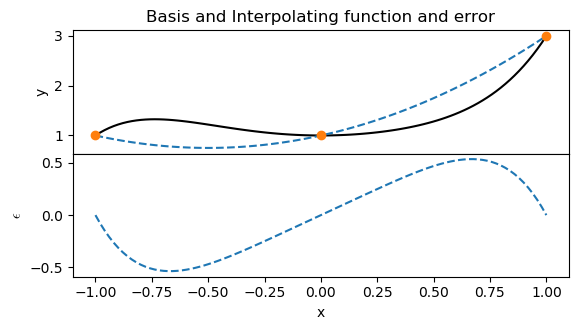

In [60]:
#b) Numerically calculate the Lagrange basis functions and interpolating functions
# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sqrt

# SciPy
import scipy.interpolate as interpolate

# Settings
mpl.style.use('default')
mpl.rcParams['legend.frameon']   = False
mpl.rcParams['mathtext.fontset'] = 'cm'

def f(x):
    return (x**5)+(x**2)+1 

# Define Lagrange interpolating function
def lagrange(x,xk,yk):
    Nx = len(x)
    Nk = len(xk)
    P  = np.zeros(Nx)
    
    for k in range(Nk):
        # kth basis function
        bx = np.ones(Nx)
        
        for m in range(k):
            bx *= (x - xk[m])/(xk[k] - xk[m])
        for m in range(k+1,Nk):
            bx *= (x - xk[m])/(xk[k] - xk[m])
            
        P += bx*yk[k]
        
    return P

Nx = 100
x1 = -1
x2 = 1
x  = np.linspace(x1,x2,Nx)
y  = f(x)


# Sampling points
Nk = 3
xk = np.linspace(x1,x2,Nk)
yk = f(xk)


# Lagrange interpolation
yL    = lagrange(x,xk,yk)
err   = yL - y
delta = err/y


# Make plot
plt.figure(dpi=100)
plt.subplots_adjust(wspace=0, hspace=0)

# Function
plt.subplot(311)
plt.plot(x,  y,  'k-')
plt.plot(x,  yL, 'C0--')
plt.plot(xk, yk, 'C1o')
plt.ylabel('y')
plt.title('Basis and Interpolating function and error')

# Residual errors
plt.subplot(312)
plt.plot(x, err, 'C0--')
plt.ylabel('$\epsilon$')
plt.xlabel('x')



plt.show()

In [54]:
#Gaussian quadrature to calculate the integral
# Python
from datetime import datetime
from math     import erf

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy                     as np
import numpy.polynomial.legendre as legendre

a  = -1
b  = 1


Ig = erf(b/sqrt(2.0))
print('x      =', b)
print('erf(x) =', Ig, '\n')


# Define Gaussian integrand for error function
def f(x):
    return (x**5)+(x**2)+1 

# Vary number of Legend
for N in range(1,4):
    # Legendre roots and weights
    x,w = legendre.leggauss(N)

    # Abscissas and weights
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w

    # Calc integral using dot product
    I = np.dot(wp, f(xp))

    # Fractional error
    e = I/Ig - 1
print('N =', N, 'I =', I)

x      = 1
erf(x) = 0.6826894921370859 

N = 3 I = 2.666666666666667


Integrating exactly gives a result of 2 and 2/3 and the computed value matches that value exactly to the float's numerical limit of accuracy

### 2) Electric field of a charge distribution

/Users/rosakurtz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in double_scalars


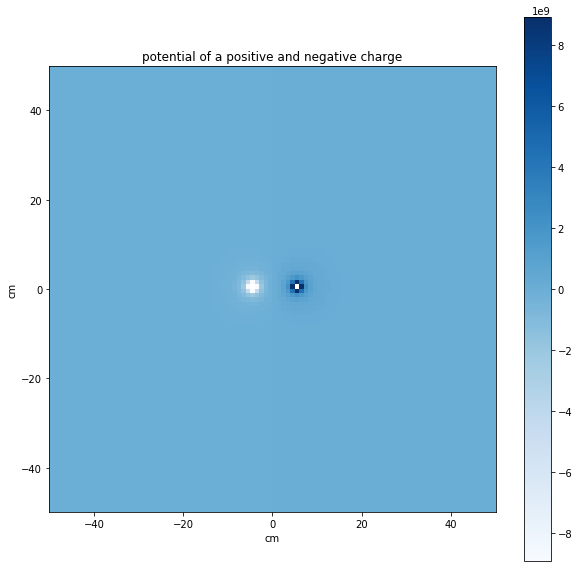

In [48]:
#5.21 from text part a
#Electric field of a charge distribution

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt

mpl.rcParams['legend.frameon'] = False

m = 100
n = 100

x_min=-50
x_max=50
y_min=-50
y_max=50

P_1 = np.zeros([m,n], dtype=float)
P_2 = np.zeros([m,n], dtype=float)
P_total = np.zeros([m,n], dtype=float)

q_1=1
x_1=5
y_1=0

q_2=-1
x_2=-5
y_2=0

e_0=8.854*(10**-12)

def f(x,y):
    C=q_1/(4*pi*e_0)
    return C*(((1/((sqrt(((x-5.)**2)+(y**2))**2)))-(1/((sqrt(((x+5)**2)+(y**2))**2)))))

for j in range(n):
    for i in range(m):
        x=x_min + j*(x_max-x_min)/n
        y=y_min + i*(y_max-y_min)/m
        P_total[i,j] = f(x,y) #100 is for cm to m conversion
        

fig = plt.figure(figsize=(10, 10))
plt.title('potential of a positive and negative charge')
plt.xlabel('cm')
plt.ylabel('cm')
color_map = plt.imshow(P_total, origin='lower', extent=[-50,50,-50,50])
color_map.set_cmap("Blues")

plt.colorbar()


plt.show()


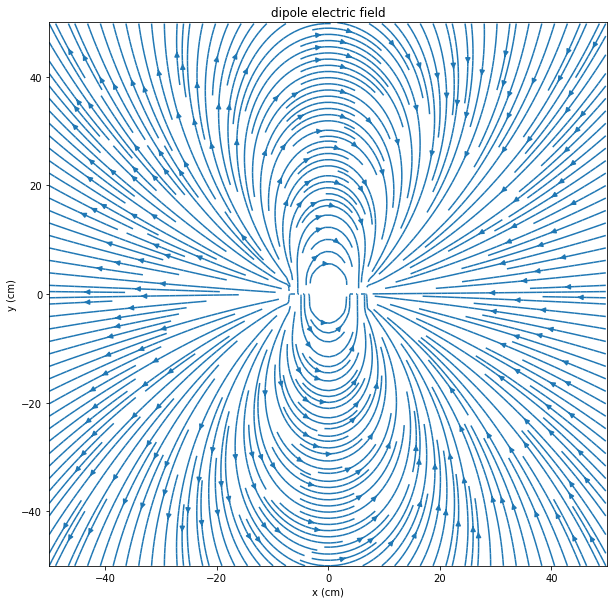

In [56]:
# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt

import matplotlib.gridspec as gridspec

e_0=8.854*(10**-12)
q=1

def f(x,y):
    C=q/(4*pi*e_0)
    return C*(((1/((sqrt(((x-5)**2)+(y**2))**2)))-(1/((sqrt(((x+5)**2)+(y**2))**2)))))

def x_partial(f,xp,yp,h):
    return (f(xp+h,yp)-f(xp-h,yp))/(2*h)

def y_partial(f,xp,yp,h):
    return (f(xp,yp+h)-f(xp,yp-h))/(2*h)

x1 = -50
x2 = 50
N  = 100
h  = (x2 - x1)/N
    
w = 50
Y, X = np.mgrid[-w:w:50j, -w:w:50j]
U = x_partial(f,X,Y,h)
V = y_partial(f,X,Y,h)



mpl.rcParams['legend.frameon'] = False
fig = plt.figure(figsize=(10, 10))


#u=np.zeros([m,n], dtype=float)
#v=np.zeros([m,n], dtype=float)

plt.streamplot(X, Y, U, V, density=3)
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.title('dipole electric field')
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.show()

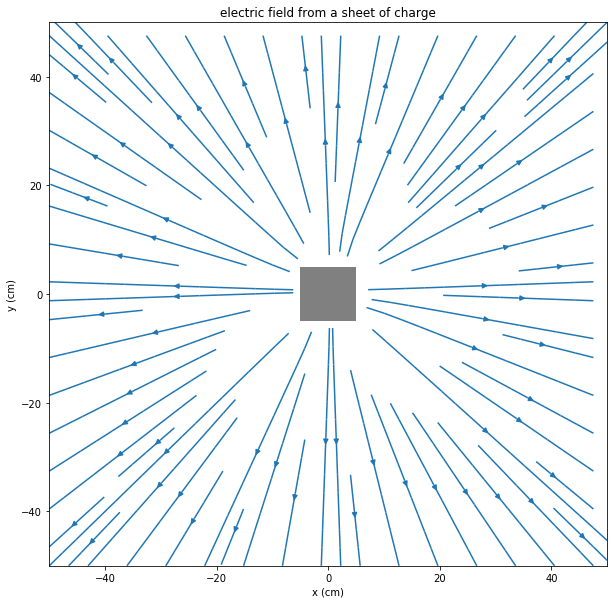

In [12]:
# part c with double integral

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt

import matplotlib.gridspec as gridspec

from scipy import integrate

#Compute the double integral of x * y**2 over the box x ranging from 0 to 2 and y ranging from 0 to 1.


q_0 = .01 #C/cm^2
L = 10 #cm
e_0=8.854*(10**-12)

x_min=-5
x_max=5
y_min=-5
y_max=5


C=1/(4*pi*e_0)

def f_x(x,y,xp,yp):
    return C*q_0*(sin((2*pi*x)/L)*sin((2*pi*x)/L)*(xp-x))/(sqrt(((xp-x)**2)+((yp-y)**2))**3)
def f_y(x,y,xp,yp):
    return C*q_0*(sin((2*pi*x)/L)*sin((2*pi*x)/L)*(yp-y))/(sqrt(((xp-x)**2)+((yp-y)**2))**3)


#I_x=integrate.dblquad(lambda x, y: f_x(x,y,p_x,p_y), x_min, x_max, lambda x: y_min, lambda x: y_max)
#I_y=integrate.dblquad(lambda x, y: f_y(x,y,p_x,p_y), x_min, x_max, lambda x: y_min, lambda x: y_max)


m=100

x=np.linspace(-m/2,m/2,m)
y=np.linspace(-m/2,m/2,m)
E_x=np.zeros([m,m], dtype=float)
E_y=np.zeros([m,m], dtype=float)

#outside sheet
def loopy():
    for j in range(0,m-1):
        for i in range(0,m-1):
            if j<44 or j>56 or i<44 or i>56:
                px=-50 + j*(m)/m
                py=-50 + i*(m)/m
                I_x, errx = integrate.dblquad(lambda x, y: f_x(x,y,px,py), x_min, x_max, lambda x: y_min, lambda x: y_max)
                I_y, erry = integrate.dblquad(lambda x, y: f_y(x,y,px,py), x_min, x_max, lambda x: y_min, lambda x: y_max)
                E_x[i,j] = I_x
                E_y[i,j] = I_y
loopy()   
#inside sheet
for j in range(44,56):
        for i in range(44,56):
            if j<44 or j>56 or i<44 or i>56:
                px=-50 + j*(m)/m
                py=-50 + i*(m)/m
                I_x, errx = integrate.dblquad(lambda x, y: f_x(x,y,px,py), -px, px, lambda x: -py, lambda x: py)
                I_y, erry = integrate.dblquad(lambda x, y: f_y(x,y,px,py), -px, px, lambda x: -py, lambda x: py)
                E_x[i,j] = I_x
                E_y[i,j] = I_y
        



U=np.zeros([m,m], dtype=float)

mask = np.zeros([m,m], dtype=bool)
mask[45:55, 45:55] = 1
U = np.ma.array(U, mask=mask)
U[:20, :20] = np.nan


mpl.rcParams['legend.frameon'] = False
fig = plt.figure(figsize=(10, 10))

plt.streamplot(x, y, E_x, E_y, density=1)
plt.imshow(~mask, extent=(-50, 50, -50, 50), alpha=0.5,interpolation='nearest', cmap='gray', aspect='auto')

plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.title('electric field from a sheet of charge')
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.show()





### 3) Image Processing and the STM

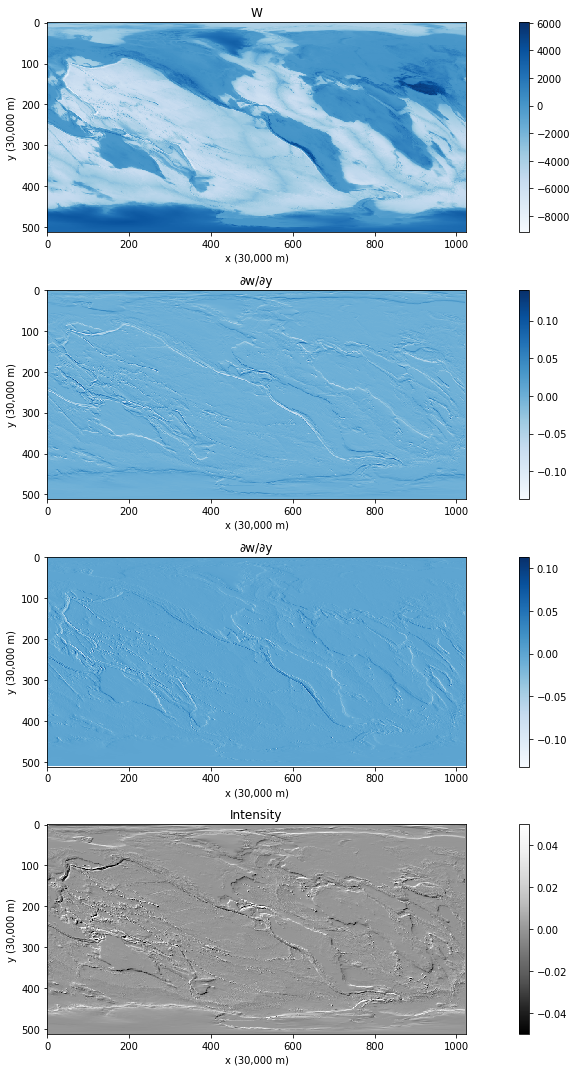

In [4]:

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt

mpl.rcParams['legend.frameon'] = False

f=open("Desktop/altitude.txt",'r')
#b=open("Desktop/base.txt",'r')
#now I have the file


#PART A)
#Write a program that reads this file and stores the data in an array. 

contents =f.read()
#base_contents=b.read()
#now I have a giant mess of numbers(contents) in string form

#contents becomes a list(data)
data = contents.split()
#data_b=base_contents.split()

#print(len(data)) #=> number of points in the data set of which there are 524288
#print(len(data_b)) #x_width :1024
#print(len(data)/len(data_b)) #y_width :512

#**Explanation: I created a separate text file using the provided altitude.txt which contains a subset of the 
#data copied up to the first indentation to get the dimensions of the data set. These numbers are provided
#exactly below so the program will run without needing the file I created,(the one called base.txt).

n=512
m=1024

W=np.zeros([n,m], dtype=float)

k=0
for j in range(0,n-1):
    for i in range(0,m-1):
        W[j,i]=data[k]
        k=k+1       
#now W should be a two-d array of heights

#given:
h=30000 #distance between data points in meters

#Now calculate the derivatives ∂w/∂x and ∂w/∂y at each grid point.

def x_partial(xp,yp,h):
    #return (f(xp+h,yp)-f(xp-h,yp))/(2*h)
    return (W[xp+1,yp]-W[xp-1,yp])/(2*h)

def y_partial(xp,yp,h):
    #return (f(xp,yp+h)-f(xp,yp-h))/(2*h)
    return (W[xp,yp+1]-W[xp,yp-1])/(2*h)



def forwarddiff_x(xp,yp,h):
    return (W[xp+1,yp]-W[xp,yp])/h

def backwarddiff_x(xp,yp,h):
    return (W[xp,yp]-W[xp-1,yp])/h

def forwarddiff_y(xp,yp,h):
    return (W[xp,yp+1]-W[xp,yp])/h

def backwarddiff_y(xp,yp,h):
    return (W[xp,yp]-W[xp,yp-1])/h



dW_xpartial=np.zeros([n,m], dtype=float)
dW_ypartial=np.zeros([n,m], dtype=float)

#ignore edges when using central difference method, I'll handle that later
for j in range(1,n-2):
    for i in range(1,m-2):
        dW_xpartial[j,i]=x_partial(j,i,h)
        dW_ypartial[j,i]=y_partial(j,i,h)
 


#left diff for top and left sides

for i in range(0,m-1):
    dW_xpartial[0,i]=backwarddiff_x(j,i,h)
    dW_ypartial[0,i]=backwarddiff_y(j,i,h)
        
for j in range(0,n-1):
    dW_xpartial[j,0]=backwarddiff_x(j,i,h)
    dW_ypartial[j,0]=backwarddiff_y(j,i,h)
        
        
#right diff bottom and right sides

for i in range(0,m-1):
    dW_xpartial[n-1,i]=forwarddiff_x(j,i,h)
    dW_ypartial[n-1,i]=forwarddiff_y(j,i,h)
        

for i in range(1,m-2):
    dW_xpartial[j,m-1]=forwarddiff_x(j,i,h)
    dW_ypartial[j,m-1]=forwarddiff_y(j,i,h)
        
        


#PART B)
#intensity i is given by I = cos φ (∂w/∂x) + sin φ (∂w/∂y)/ sqrt(􏰌(∂w/∂x)2 + (∂w/∂y)2 + 1 )
# if φ = 45 :
# I = (sqrt(2)/2)(∂w/∂x) + (sqrt(2)/2)(∂w/∂y) / sqrt(􏰌(∂w/∂x)2 + (∂w/∂y)2 + 1 )

I=np.zeros([n,m], dtype=float)
a=sqrt(2)/2

for j in range(0,n-1):
    for i in range(0,m-1):
        I[j][i]=(a*dW_xpartial[j,i]+a*dW_ypartial[j,i])/(sqrt((dW_xpartial[j,i]**2)+(dW_ypartial[j,i]**2)+1))


fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(411)
k = ax1.imshow(W, cmap='Blues')
fig.colorbar(k, ax=ax1)
plt.ylabel('y (30,000 m)')
plt.xlabel('x (30,000 m)')
plt.title('W')

ax2 = fig.add_subplot(412)
k = ax2.imshow(dW_xpartial, cmap='Blues')
fig.colorbar(k, ax=ax2)
plt.ylabel('y (30,000 m)')
plt.xlabel('x (30,000 m)')
plt.title('∂w/∂y')

ax3 = fig.add_subplot(413)
k = ax3.imshow(dW_ypartial, cmap='Blues')
fig.colorbar(k, ax=ax3)
plt.ylabel('y (30,000 m)')
plt.xlabel('x (30,000 m)')
plt.title('∂w/∂y')

ax4 = fig.add_subplot(414) #this one for intensity
k = ax4.imshow(I, cmap='Greys_r', vmin=-.05, vmax=.05)
fig.colorbar(k, ax=ax4)
plt.ylabel('y (30,000 m)')
plt.xlabel('x (30,000 m)')
plt.title('Intensity')



fig.tight_layout()
plt.show()


